In [1]:
# Configure & load data

CONFIG = {
  'fz28': {
    'url': "https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_2024_01.xlsx?__blob=publicationFile&v=5",
    'sheet_name': 'FZ 28.2',
  }
}

from utils.data_import import ImportUtils
import pandas as pd

file = ImportUtils.load_kba_fz28_file(CONFIG['fz28'])

In [2]:
file.data

,total,total_alt,share_alt,total_ev,share_ev,total_bev,total_fecv,total_phev
date,,,,,,,,
2024-01-01,213553.0,90888.0,42.6,36873.0,40.6,22474.0,5.0,14394.0
2023-12-01,241883.0,129584.0,53.6,72554.0,56.0,54654.0,6.0,17894.0
2023-11-01,245701.0,124494.0,50.7,63068.0,50.7,44942.0,2.0,18124.0
2023-10-01,218959.0,112427.0,51.3,53698.0,47.8,37334.0,3.0,16361.0
2023-09-01,224502.0,105620.0,47.0,47100.0,44.6,31714.0,3.0,15383.0
...,...,...,...,...,...,...,...,...
2016-05-01,286931.0,4039.0,1.4,1381.0,34.2,588.0,1.0,792.0
2016-04-01,315921.0,4929.0,1.6,1581.0,32.1,604.0,13.0,964.0
2016-03-01,322913.0,5724.0,1.8,2399.0,41.9,1104.0,5.0,1290.0


In [7]:
file.data.to_excel('export/fz28_2024_01_parsed.xlsx')

<Axes: xlabel='date'>

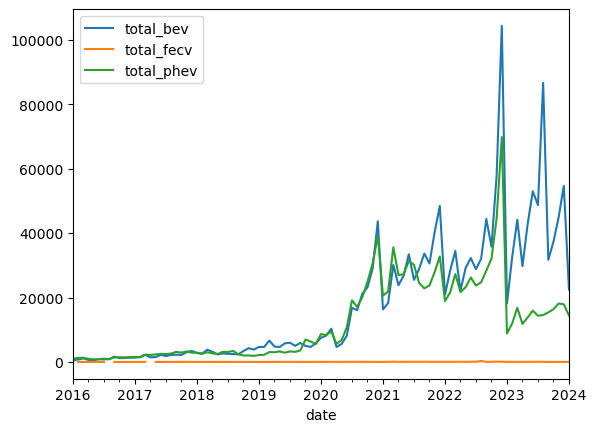

In [5]:
file.data[
  ['total_bev','total_fecv','total_phev']
].plot()

In [16]:
df = file.data
df['date'] = file.data.index
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year

In [14]:

df

,total,total_alt,share_alt,total_ev,share_ev,total_bev,total_fecv,total_phev,date,quarter
date,,,,,,,,,,
2024-01-01,213553.0,90888.0,42.6,36873.0,40.6,22474.0,5.0,14394.0,2024-01-01,1
2023-12-01,241883.0,129584.0,53.6,72554.0,56.0,54654.0,6.0,17894.0,2023-12-01,4
2023-11-01,245701.0,124494.0,50.7,63068.0,50.7,44942.0,2.0,18124.0,2023-11-01,4
2023-10-01,218959.0,112427.0,51.3,53698.0,47.8,37334.0,3.0,16361.0,2023-10-01,4
2023-09-01,224502.0,105620.0,47.0,47100.0,44.6,31714.0,3.0,15383.0,2023-09-01,3
...,...,...,...,...,...,...,...,...,...,...
2016-05-01,286931.0,4039.0,1.4,1381.0,34.2,588.0,1.0,792.0,2016-05-01,2
2016-04-01,315921.0,4929.0,1.6,1581.0,32.1,604.0,13.0,964.0,2016-04-01,2
2016-03-01,322913.0,5724.0,1.8,2399.0,41.9,1104.0,5.0,1290.0,2016-03-01,1


In [31]:
quarter_sums = df[[
  'total_bev','total_phev','total_fecv', 'total_ev',
  'year','quarter']
].groupby(['year','quarter']).sum()
quarter_sums.reset_index(inplace=True)
quarter_sums

,year,quarter,total_bev,total_phev,total_fecv,total_ev
0,2016,1,2332.0,3503.0,11.0,5846.0
1,2016,2,2025.0,2621.0,26.0,4672.0
2,2016,3,3321.0,3272.0,6.0,6599.0
3,2016,4,3732.0,4348.0,6.0,8086.0
4,2017,1,5060.0,5264.0,4.0,10328.0
5,2017,2,5129.0,7000.0,6.0,12135.0
6,2017,3,6244.0,8152.0,61.0,14457.0
7,2017,4,8623.0,9020.0,49.0,17692.0
8,2018,1,9102.0,8447.0,24.0,17573.0
9,2018,2,8132.0,8236.0,37.0,16405.0


In [32]:
quarter_sums.to_excel('export/fz28_2024_01_quarterly_totals.xlsx')